In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
df.shape

(50, 4)

In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

<Axes: xlabel='count'>

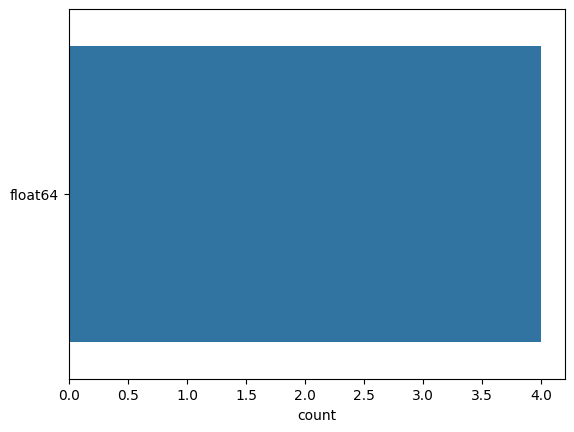

In [ ]:
sns.countplot(data=df,y=df.dtypes)

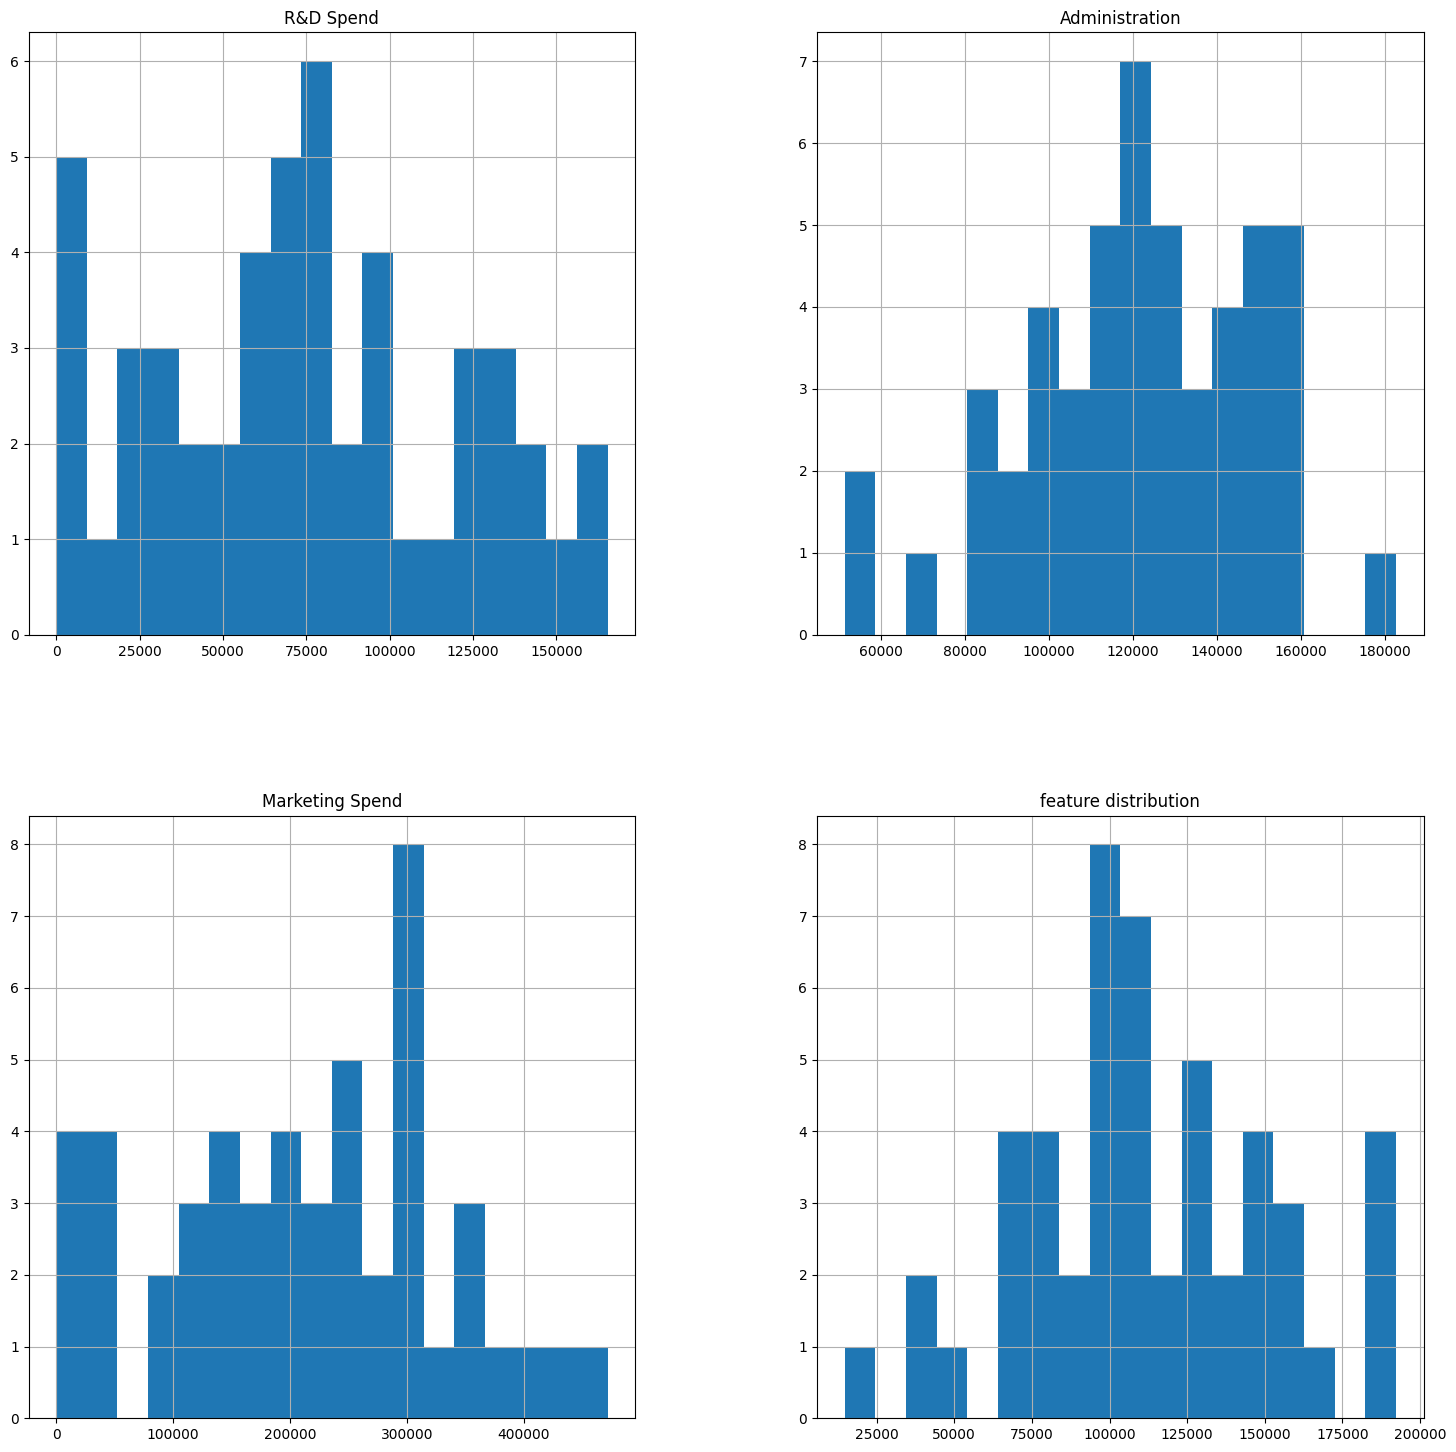

In [ ]:
df.hist(figsize=(18,18),bins=18)
plt.title('feature distribution')
plt.show()

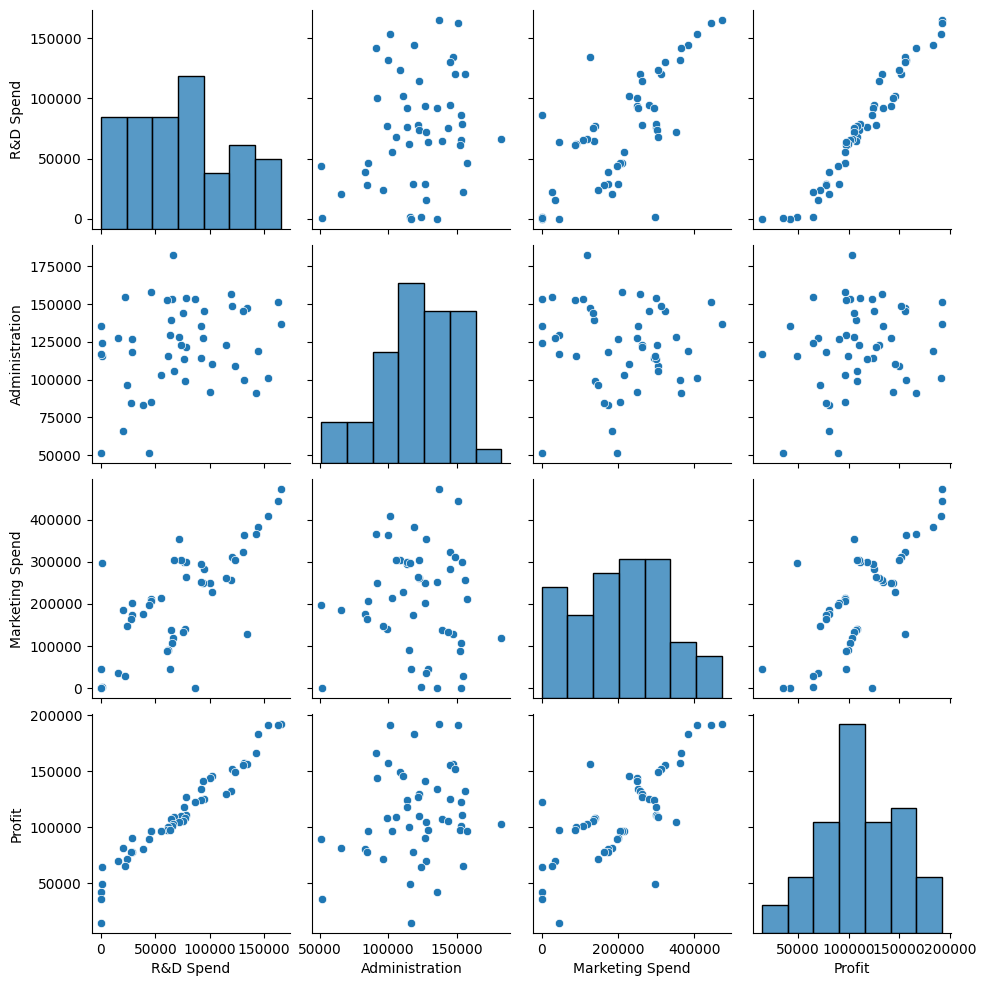

In [ ]:
sns.pairplot(df)

<Axes: >

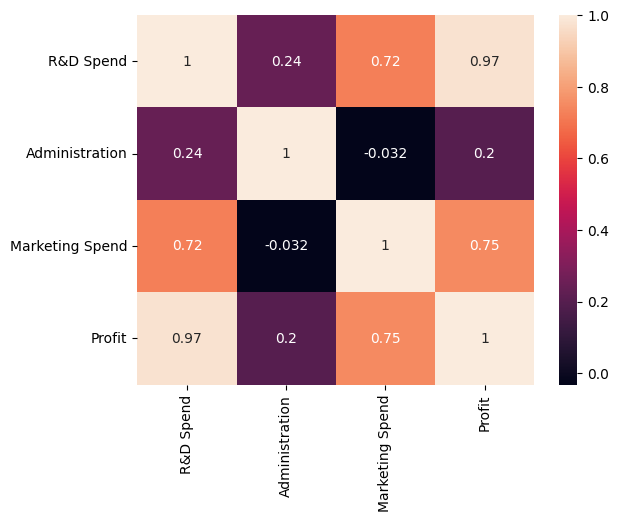

In [ ]:
sns.heatmap(df.corr(), annot = True)

<ipython-input-12-57f3ee6aa260>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


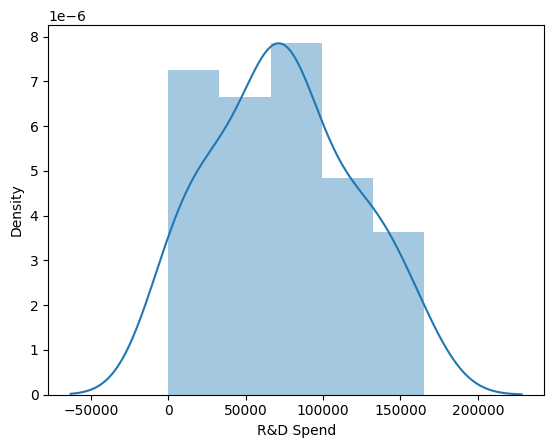

<ipython-input-12-57f3ee6aa260>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


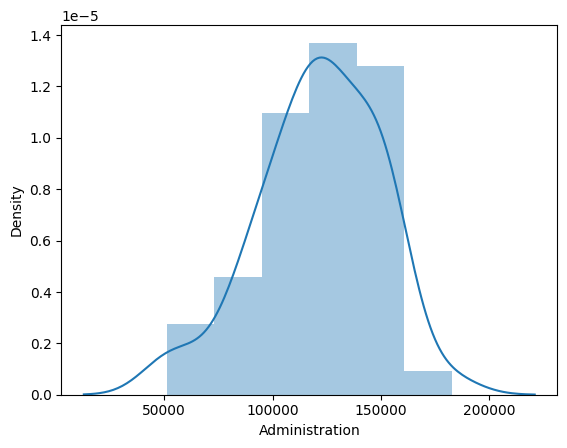

<ipython-input-12-57f3ee6aa260>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


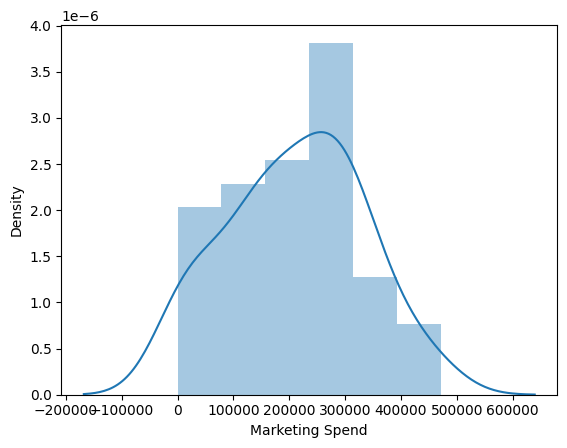

<ipython-input-12-57f3ee6aa260>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


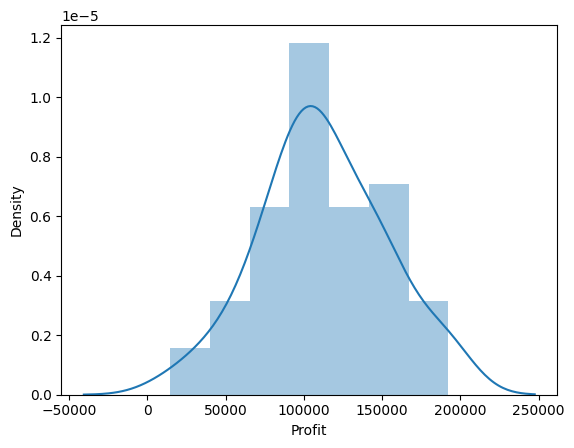

In [ ]:
for i in df:
  sns.distplot(df[i])
  plt.show()

Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Model creation


In [ ]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)

0.94033416147394

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,150,200,300]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-112605579.4564836


In [ ]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(x_train, y_train)
br.score(x_train, y_train)


1.716721873545879e-07

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9867360080563187

Finding out the training accuracy and different metrics for the same

In [ ]:
y_lr = lg.predict(x_train)
y_br = br.predict(x_train)
y_rd = ridge_regressor.predict(x_train)
y_rf=rf.predict(x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print("MAE linear_regression",mae(y_train,y_lr))
print("MAE bayesian_ridge",mae(y_train,y_br))
print("MAE ridge_regressor",mae(y_train,y_rd))
print("MAE Random Forest",mae(y_train,y_rf))

MAE linear_regression 7005.900204620056
MAE bayesian_ridge 31504.73620997103
MAE ridge_regressor 7005.668844563058
MAE Random Forest 3305.000208108103


In [ ]:
from sklearn.metrics import mean_squared_error as mse
print("MSE linear_regression", mse(y_train,y_lr)**(1/2))
print("MSE bayesian_ridge", mse(y_train,y_br)**(1/2))
print("MSE ridge_regressor", mse(y_train,y_rd)**(1/2))
print("MSE Random Forest", mse(y_train, y_rf)**(1/2))

MSE linear_regression 9371.944308442147
MSE bayesian_ridge 38367.79029224882
MSE ridge_regressor 9371.954418333431
MSE Random Forest 4418.7959743440115


In [ ]:
from sklearn.metrics import r2_score
print("R2 linear Regression", r2_score(y_train, y_lr))
print("R2 Bayesian Regression", r2_score(y_train, y_br))
print("R2 Ridge Regressor", r2_score(y_train, y_rd))
print("R2 Random Forest", r2_score(y_train, y_rf))

R2 linear Regression 0.94033416147394
R2 Bayesian Regression 1.716721873545879e-07
R2 Ridge Regressor 0.9403340327460162
R2 Random Forest 0.9867360080563187


Finding out the metrics for test dataset


In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
print("R2 score of Random Forest Regression", r2_score(y_test, y_pred))
print("Root Mean Squared Error of Random Forest Regression", mse(y_test,y_pred)**(1/2))
print("Mean Absolute Error of Random Forest Regression",mae(y_test,y_pred))

R2 score of Random Forest Regression 0.9603522693077513
Root Mean Squared Error of Random Forest Regression 8755.867647562347
Mean Absolute Error of Random Forest Regression 7669.349699999996
